# Introduction
In this experiment, we limited the number of patterns by the number of their occurrence during the day. This number of occurrences is assumed to be 100. There are 14 patterns left out of 196. Another change is that the period for assessing price changes here is not a fixed value, but can take one of the values in the range from 5 through 10.

In [1]:
import pandas as pd
import numpy as np
from pickle import load
import matplotlib.pyplot as plt
import os 
os.chdir('../..')

In [2]:
similarity = 90
height, width = 10, 5
window = 10
periods = range(5, 11)

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/{similarity}/{width}x{height}/Q_matrix_win{periods[0]}_{periods[-1]}_filter_count.pkl', 'rb'))
count_cols = [col for col in Qmatrix_init.columns if 'count' in col] 
pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

columns_to_show = (['date', 'prototype', 'code']+buy_cols+hold_cols+sell_cols+count_cols+pl_cols).sort()

Qmatrix = Qmatrix_init   # [['date', 'prototype', 'code', 'buy', 'hold', 'sell']+pl_cols]
Qmatrix.head()

,date,original_index,prototype,prototype_label,diff,min_price,max_price,all_prices,code,similarity,...,"(iter_9, hold_count)","(iter_9, sell_count)","(iter_9, buy_profit)","(iter_9, buy_loss)","(iter_9, sell_profit)","(iter_9, sell_loss)","(iter_9, buy_profit_count)","(iter_9, buy_loss_count)","(iter_9, sell_profit_count)","(iter_9, sell_loss_count)"
1531,2020-01-02 09:30:00.008,5,5,1,0.01,323.56,323.57,"[323.57, 323.56, 323.57, 323.56, 323.57]","[1, 0, 1, 0, 1]",100.0,...,0,0,111.33,-55.26,0.00,0.00,8539,4221,0,0
20874,2020-01-02 09:30:00.090,6,6,1,0.02,323.56,323.58,"[323.56, 323.57, 323.56, 323.57, 323.58]","[0, 1, 0, 1, 2]",100.0,...,0,0,20.26,-12.42,0.00,0.00,932,473,0,0
25063,2020-01-02 09:30:00.183,10,7,1,0.02,323.56,323.58,"[323.58, 323.57, 323.58, 323.56, 323.57]","[2, 1, 2, 0, 1]",100.0,...,0,0,1.02,-0.63,0.00,0.00,53,34,0,0
28055,2020-01-02 09:30:00.267,13,8,1,0.01,323.56,323.57,"[323.56, 323.57, 323.56, 323.57, 323.56]","[0, 1, 0, 1, 0]",100.0,...,0,13401,0.00,0.00,111.36,-64.52,0,0,8489,4326
38100,2020-01-02 09:30:00.321,26,16,1,0.02,323.56,323.58,"[323.57, 323.58, 323.57, 323.56, 323.58]","[1, 2, 1, 0, 2]",100.0,...,0,0,1.25,-0.84,0.00,0.00,69,44,0,0


### Visualization of learning process. Profit maximization

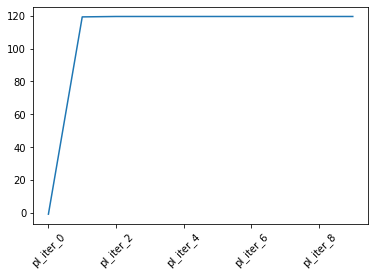

In [3]:
Qmatrix[pl_cols].sum().plot(rot=45);

### Max PL

In [4]:
# max PL
Qmatrix[pl_cols].sum().max()

119.60999999999615

#### Summary
Due to the high frequency of the patterns appearing, they learned quickly. Thus, it only took one iteration after the initialization process to reach a steady state. The maximum PL value is almost 120. That is 6% lower than the result of patterns without a filter by the number of occurrences and with a fixed price change period of 5 periods.

In [5]:
stat_cols = ['buy_count', 'hold_count', 'sell_count',
                             'buy_profit', 'buy_loss', 'sell_profit', 'sell_loss',
                             'buy_profit_count', 'buy_loss_count', 'sell_profit_count', 'sell_loss_count']
iter_number = len(pl_cols)
iter_columns = ['iter_' + str(el) for el in range(iter_number)]

### Count of buys, holds and sells

In [6]:
buys = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_count')])
holds = pd.DataFrame(Qmatrix_init[('iter_1', 'hold_count')])
sells = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_count')])
for iterat in iter_columns[2:]:
    buys = buys.join(Qmatrix_init[(iterat, 'buy_count')])
    holds = holds.join(Qmatrix_init[(iterat, 'hold_count')])
    sells = sells.join(Qmatrix_init[(iterat, 'sell_count')])

In [7]:
total_count_of_actions = {'buys': buys.sum().sum(), 'holds': holds.sum().sum(), 'sells': sells.sum().sum()}

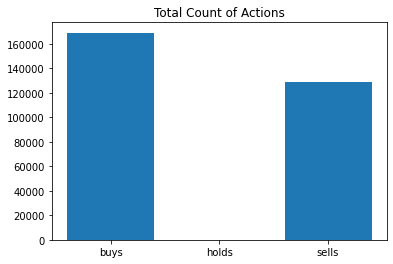

In [8]:
plt.bar(*zip(*total_count_of_actions.items()))
plt.title('Total Count of Actions')
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ax1.bar(*zip(*total_count_of_actions.items()), width = 0.7)
# ax2.bar(*zip(*total_count_of_actions_1.items()), width = 0.7)
# fig.suptitle('Profit / loss count distributions for BUY and SELL')
# plt.legend([ax1, ax2], ['With 0 teration', 'Without 0 teration'])
# plt.show()

#### Summary
The number of BUYs exceeds the rest of the pattern states. This is not due to the fact that the first random action during model initialization was defined as BUY. It can also be noted that the system of penalties has worked successfully and the patterns do not "sit out" in the HOLD state.

### Profit / loss disribution

In [9]:
buy_profit = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit')])
buy_loss = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss')])
sell_profit = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_profit')])
sell_loss = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_loss')])
for iterat in iter_columns[2:]:
    buy_profit = buy_profit.join(Qmatrix_init[(iterat, 'buy_profit')])
    buy_loss = buy_loss.join(Qmatrix_init[(iterat, 'buy_loss')])
    sell_profit = sell_profit.join(Qmatrix_init[(iterat, 'sell_profit')])
    sell_loss = sell_loss.join(Qmatrix_init[(iterat, 'sell_loss')])

In [10]:
buy_pl_distribution = {'buy_profit': buy_profit.sum().sum(), 'buy_loss': abs(buy_loss.sum().sum())}
sell_pl_distribution = {'sell_profit': sell_profit.sum().sum(), 'sell_loss': abs(sell_loss.sum().sum())}

In [11]:
# fig, ax = plt.subplots()
# ax.bar(*zip(*buy_pl_distribution.items()), width = 0.7, label='BUY')
# ax.bar(*zip(*sell_pl_distribution.items()), width = 0.7, label='SELL')
# plt.title('Profit / loss distributions for BUY and SELL')
# plt.legend()
# plt.show()

### Count of profit / loss deals

In [12]:
buy_profit_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit_count')])
buy_loss_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss_count')])
sell_profit_count = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_profit_count')])
sell_loss_count = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_loss_count')])
for iterat in iter_columns[2:]:
    buy_profit_count = buy_profit_count.join(Qmatrix_init[(iterat, 'buy_profit_count')])
    buy_loss_count = buy_loss_count.join(Qmatrix_init[(iterat, 'buy_loss_count')])
    sell_profit_count = sell_profit_count.join(Qmatrix_init[(iterat, 'sell_profit_count')])
    sell_loss_count = sell_loss_count.join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [13]:
buy_count_distribution = {'buy_profit': buy_profit_count.sum().sum(), 'buy_loss': abs(buy_loss_count.sum().sum())}
sell_count_distribution = {'sell_profit': sell_profit_count.sum().sum(), 'sell_loss': abs(sell_loss_count.sum().sum())}

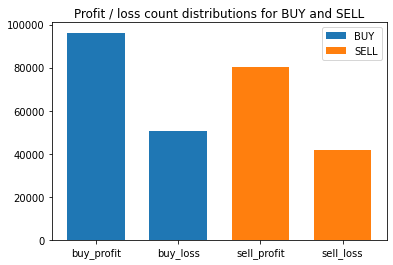

In [14]:
fig, ax = plt.subplots()
ax.bar(*zip(*buy_count_distribution.items()), width = 0.7, label='BUY')
ax.bar(*zip(*sell_count_distribution.items()), width = 0.7, label='SELL')
plt.title('Profit / loss count distributions for BUY and SELL')
plt.legend()
plt.show()

#### Summary
Patterns often choose the BUY state. This indicates an increase in the price of the instrument.

### Mean value for profit and loss

In [15]:
# calculate profit deals count and loss deals count
profit_deals_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit_count')]).join(Qmatrix_init[('iter_1', 'sell_profit_count')])
loss_deals_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss_count')]).join(Qmatrix_init[('iter_1', 'sell_loss_count')])
for iterat in iter_columns[2:]:
    profit_deals_count = profit_deals_count.join(Qmatrix_init[(iterat, 'buy_profit_count')]).join(Qmatrix_init[(iterat, 'sell_profit_count')])
    loss_deals_count = loss_deals_count.join(Qmatrix_init[(iterat, 'buy_loss_count')]).join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [16]:
profit = buy_pl_distribution['buy_profit'] + sell_pl_distribution['sell_profit']
loss = buy_pl_distribution['buy_loss'] + sell_pl_distribution['sell_loss']

mean_profit_deal = profit / profit_deals_count.sum().sum()
mean_loss_deal = loss / loss_deals_count.sum().sum()

print(f'Mean_profit_deal: {mean_profit_deal}. \nMean_loss_deal: {mean_loss_deal}.')

Mean_profit_deal: 0.013981423868406234. 
Mean_loss_deal: 0.015129286511921448.


#### Summary
There is practically no difference between the average of a profitable and a losing trade.

## Summary
This experiment was carried out in parallel with another. Their main difference is that in one experiment the filter of the appearance of patterns during the day was applied, while in the other it was not. Maximum PL is 3% higher for filtered patterns. We can say that 14 out of 196 patterns give 94% of the result compared to PL = 127 obtained with a fixed period of 5. 